In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [71]:
df_cancer = pd.read_csv(r"C:\Users\rajes\Downloads\Cancer_10.csv")
df_db = pd.read_csv(r'C:\Users\rajes\Downloads\Diabeties_10.csv')
df_db = df_db.iloc[:len(df_cancer)]
df = pd.concat([df_db,df_cancer],axis =1)
len(df)

569

In [72]:
df.isnull().sum()
df.duplicated().sum()

0

In [73]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diagnosis,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,6,148,72,35,0,33.6,0.627,50,1,M,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,85,66,29,0,26.6,0.351,31,0,M,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,8,183,64,0,0,23.3,0.672,32,1,M,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


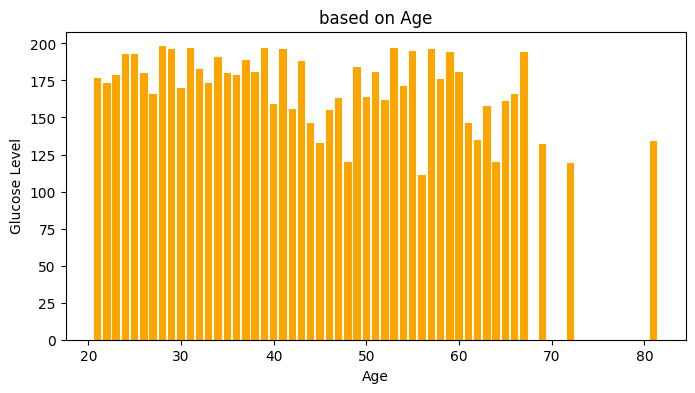

In [102]:
plt.figure(figsize=(8,4))
plt.bar(df_db['Age'],df_db['Glucose'],color = 'orange')
plt.title('based on Age')
plt.xlabel("Age")
plt.ylabel("Glucose Level")
plt.show()

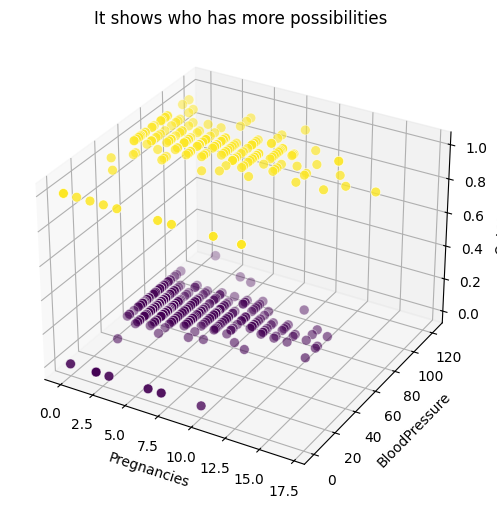

In [103]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111,projection = '3d')

ax.scatter(df['Pregnancies'],df['BloodPressure'],df['Outcome'],c = df['Outcome'], cmap = 'viridis', s =50 , lw = 0.5, edgecolors = 'w')
ax.set_title('It shows who has more possibilities')
ax.set_xlabel('Pregnancies')
ax.set_ylabel('BloodPressure')
ax.set_zlabel('Outcome')

plt.show()

# Cancer

In [76]:
df_cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [77]:
columns_of_mean = ['radius_mean', 'texture_mean', 'perimeter_mean',
                       'area_mean', 'smoothness_mean', 'compactness_mean',
                       'concavity_mean', 'concave points_mean',
                       'symmetry_mean', 'fractal_dimension_mean'
                   ]

columns_of_se = [
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
    'fractal_dimension_se']

columns_of_worst =['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

grouped_mean = df_cancer.groupby('radius_mean')[columns_of_mean].mean()
grouped_se = df_cancer.groupby('radius_se')[columns_of_se].mean()
grouped_worst = df_cancer.groupby('radius_worst')[columns_of_worst].mean()


In [78]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

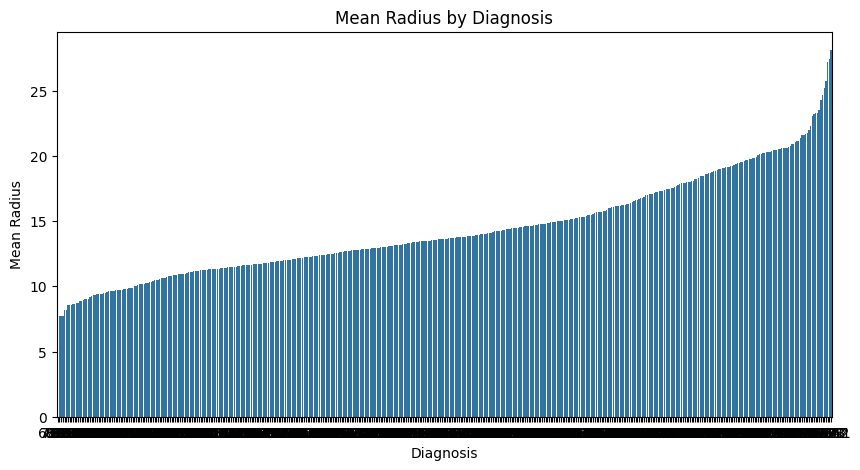

In [79]:
plt.figure(figsize= (10,5))
sns.barplot(x=grouped_mean.index, y='radius_mean', data=grouped_mean)
plt.title('Mean Radius by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Radius')
plt.show()

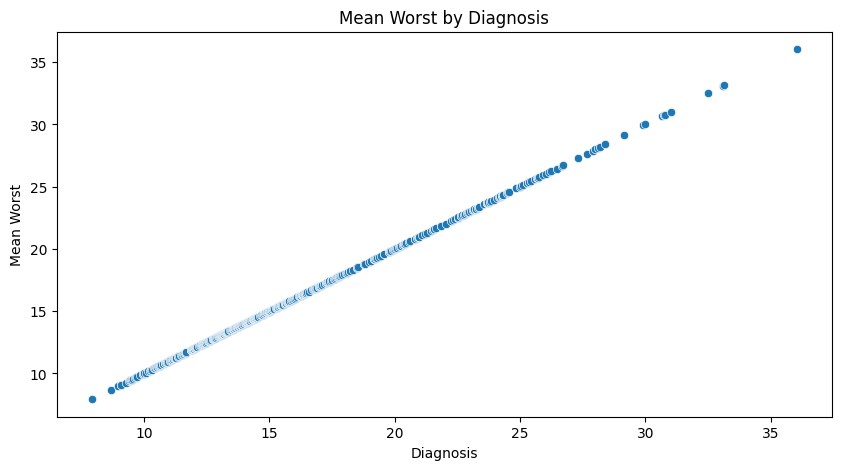

In [80]:
plt.figure(figsize= (10,5))
sns.scatterplot(x=grouped_worst.index, y='radius_worst', data=grouped_worst)
plt.title('Mean Worst by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Worst')
plt.show()

In [81]:
df_cancer[df_cancer['diagnosis'] == 'M'].head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [83]:
df_cancer 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Feautures Selection


In [84]:
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import LabelEncoder

X  = df_cancer.drop(columns=['diagnosis'])
y_data = df_cancer['diagnosis']

le  = LabelEncoder()
y_le = le.fit_transform(y_data)

y = pd.DataFrame(y_le)

selector = SelectKBest(score_func = chi2,k = 7)
X_new = selector.fit_transform(X,y)

selector_features = selector.get_support(indices = True)

print(f"Important Feauture Indices : {selector_features}")

Selected_X_features = [ X.columns[i]  for i in selector_features]

print(f"Important Feautures : {Selected_X_features}")

New_X = X[Selected_X_features]


Important Feauture Indices : [ 0  2  3 13 20 22 23]
Important Feautures : ['radius_mean', 'perimeter_mean', 'area_mean', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


# Hyper Parameter Tuning & Cross Validation

In [86]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

scaler = StandardScaler()

X_scaled = scaler.fit_transform(New_X) 

X_scaled = pd.DataFrame(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values.ravel(), test_size=0.2, random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
    'degree': [2, 3, 4], 
    'class_weight': [None, 'balanced']  
}
model = SVC()

kf = KFold(n_splits = 5, shuffle = True, random_state= 42)

grid_search = GridSearchCV(model,param_grid =param_grid,cv= kf,scoring = 'accuracy')

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_



y_pred = best_model.predict(X_test)



# Cross Evaluation

In [109]:
from  sklearn.model_selection import cross_val_score

val_score = cross_val_score(best_model,X_train,y_train)
val_score.mean()

print(f"Accuracy : {val_score.mean()*100:.3f}")


Accuracy : 92.967


# Model Evaluation

Mean Squared Error (MSE): 0.02
R-squared (R2): 0.93


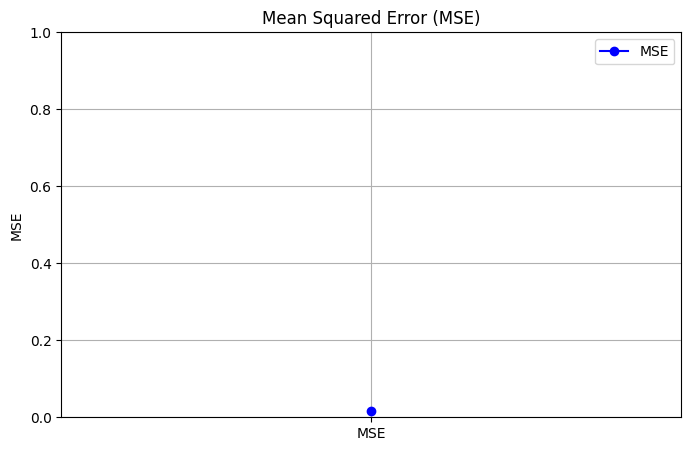

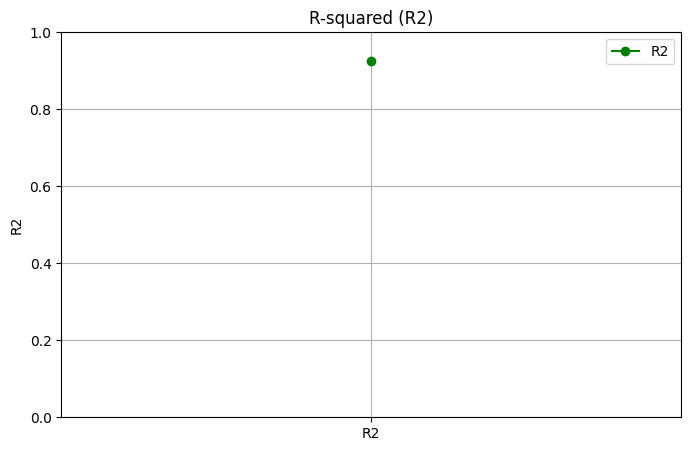

In [93]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

plt.figure(figsize=(8, 5))
plt.plot(['MSE'], [mse], marker='o', linestyle='-', color='b', label='MSE')
plt.ylim(0, 1) 
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE)')
plt.grid(True)
plt.legend()
plt.show()

# Plot R2 in a line plot
plt.figure(figsize=(8, 5))
plt.plot(['R2'], [r2], marker='o', linestyle='-', color='g', label='R2')
plt.ylim(0, 1)  
plt.ylabel('R2')
plt.title('R-squared (R2)')
plt.grid(True)
plt.legend()
plt.show()

In [96]:
# New_X = X[Selected_X_features]
# New_X

,radius_mean,perimeter_mean,area_mean,area_se,radius_worst,perimeter_worst,area_worst
0,17.99,122.80,1001.0,153.40,25.380,184.60,2019.0
1,20.57,132.90,1326.0,74.08,24.990,158.80,1956.0
2,19.69,130.00,1203.0,94.03,23.570,152.50,1709.0
3,11.42,77.58,386.1,27.23,14.910,98.87,567.7
4,20.29,135.10,1297.0,94.44,22.540,152.20,1575.0
...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,158.70,25.450,166.10,2027.0
565,20.13,131.20,1261.0,99.04,23.690,155.00,1731.0
566,16.60,108.30,858.1,48.55,18.980,126.70,1124.0
567,20.60,140.10,1265.0,86.22,25.740,184.60,1821.0


# New Data Prediction

In [110]:
new_data = pd.DataFrame({
    'radius_mean': [19.87],
    'perimeter_mean': [130.05],
    'area_mean': [386.1],
    'area_se': [99.04],
    'radius_worst': [14.910],
    'perimeter_worst': [166.10],
    'area_worst' : [1956.0]
})

prediction = best_model.predict(new_data)
print(f"Predicted diagnosis probability: {prediction[0]}")


Predicted diagnosis probability: 1


c:\Users\rajes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


# ROC Curve

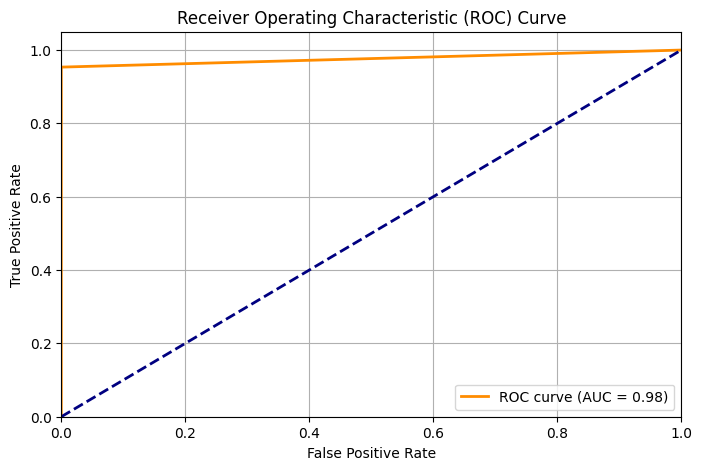

In [111]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()